In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import andrews_curves
import scipy.stats as stats
from pandas.plotting import parallel_coordinates


🔹 Dataset Shape: (560655, 13)

🔹 First 5 Rows:
    0  Electricity:Facility [kW](Hourly)  Fans:Electricity [kW](Hourly)  \
0  0                          22.035977                       3.586221   
1  1                          14.649757                       0.000000   
2  2                          14.669567                       0.000000   
3  3                          14.677808                       0.000000   
4  4                          14.824794                       0.000000   

   Cooling:Electricity [kW](Hourly)  Heating:Electricity [kW](Hourly)  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   InteriorLights:Electricity [kW](Hourly)  \
0                     

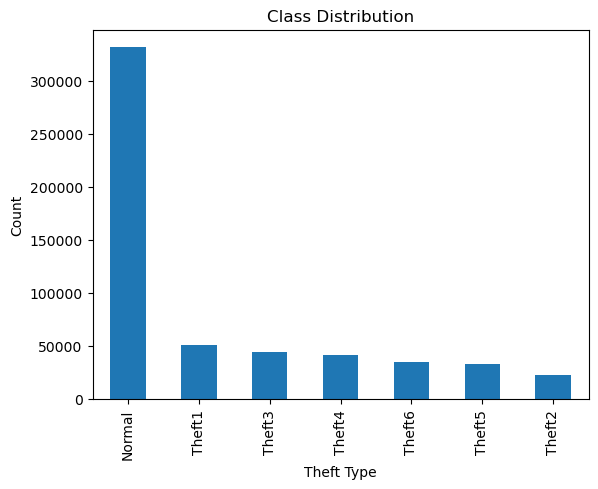

In [3]:

# Load the dataset
df = pd.read_csv("df.csv")  # Ensure "df.csv" is in the working directory

# Basic Info
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 First 5 Rows:\n", df.head())
print("\n🔹 Column Data Types:\n", df.dtypes)

# Check for missing values
print("\n🔹 Missing Values:\n", df.isnull().sum())

# Check unique values in 'theft' column
print("\n🔹 Unique Theft Classes:\n", df["theft"].value_counts())

# Summary statistics
print("\n🔹 Summary Statistics:\n", df.describe())

# Check class distribution visually (Optional)
df["theft"].value_counts().plot(kind="bar", title="Class Distribution")
plt.xlabel("Theft Type")
plt.ylabel("Count")
plt.show()


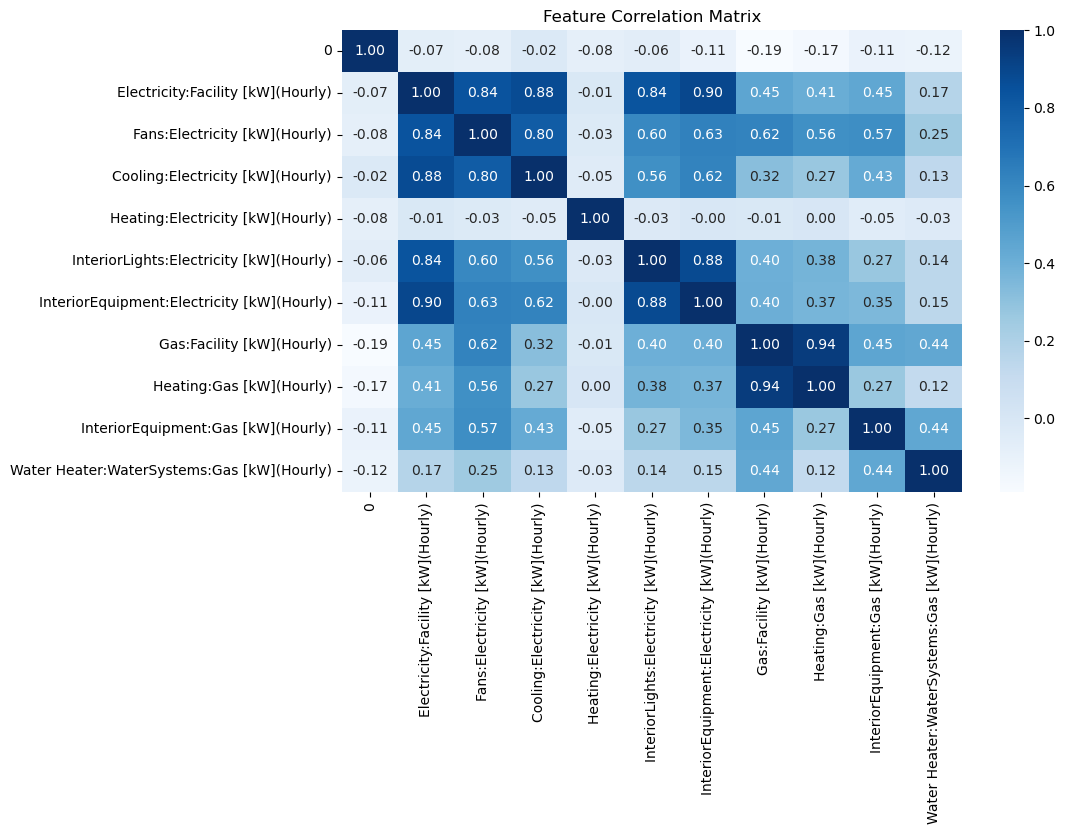

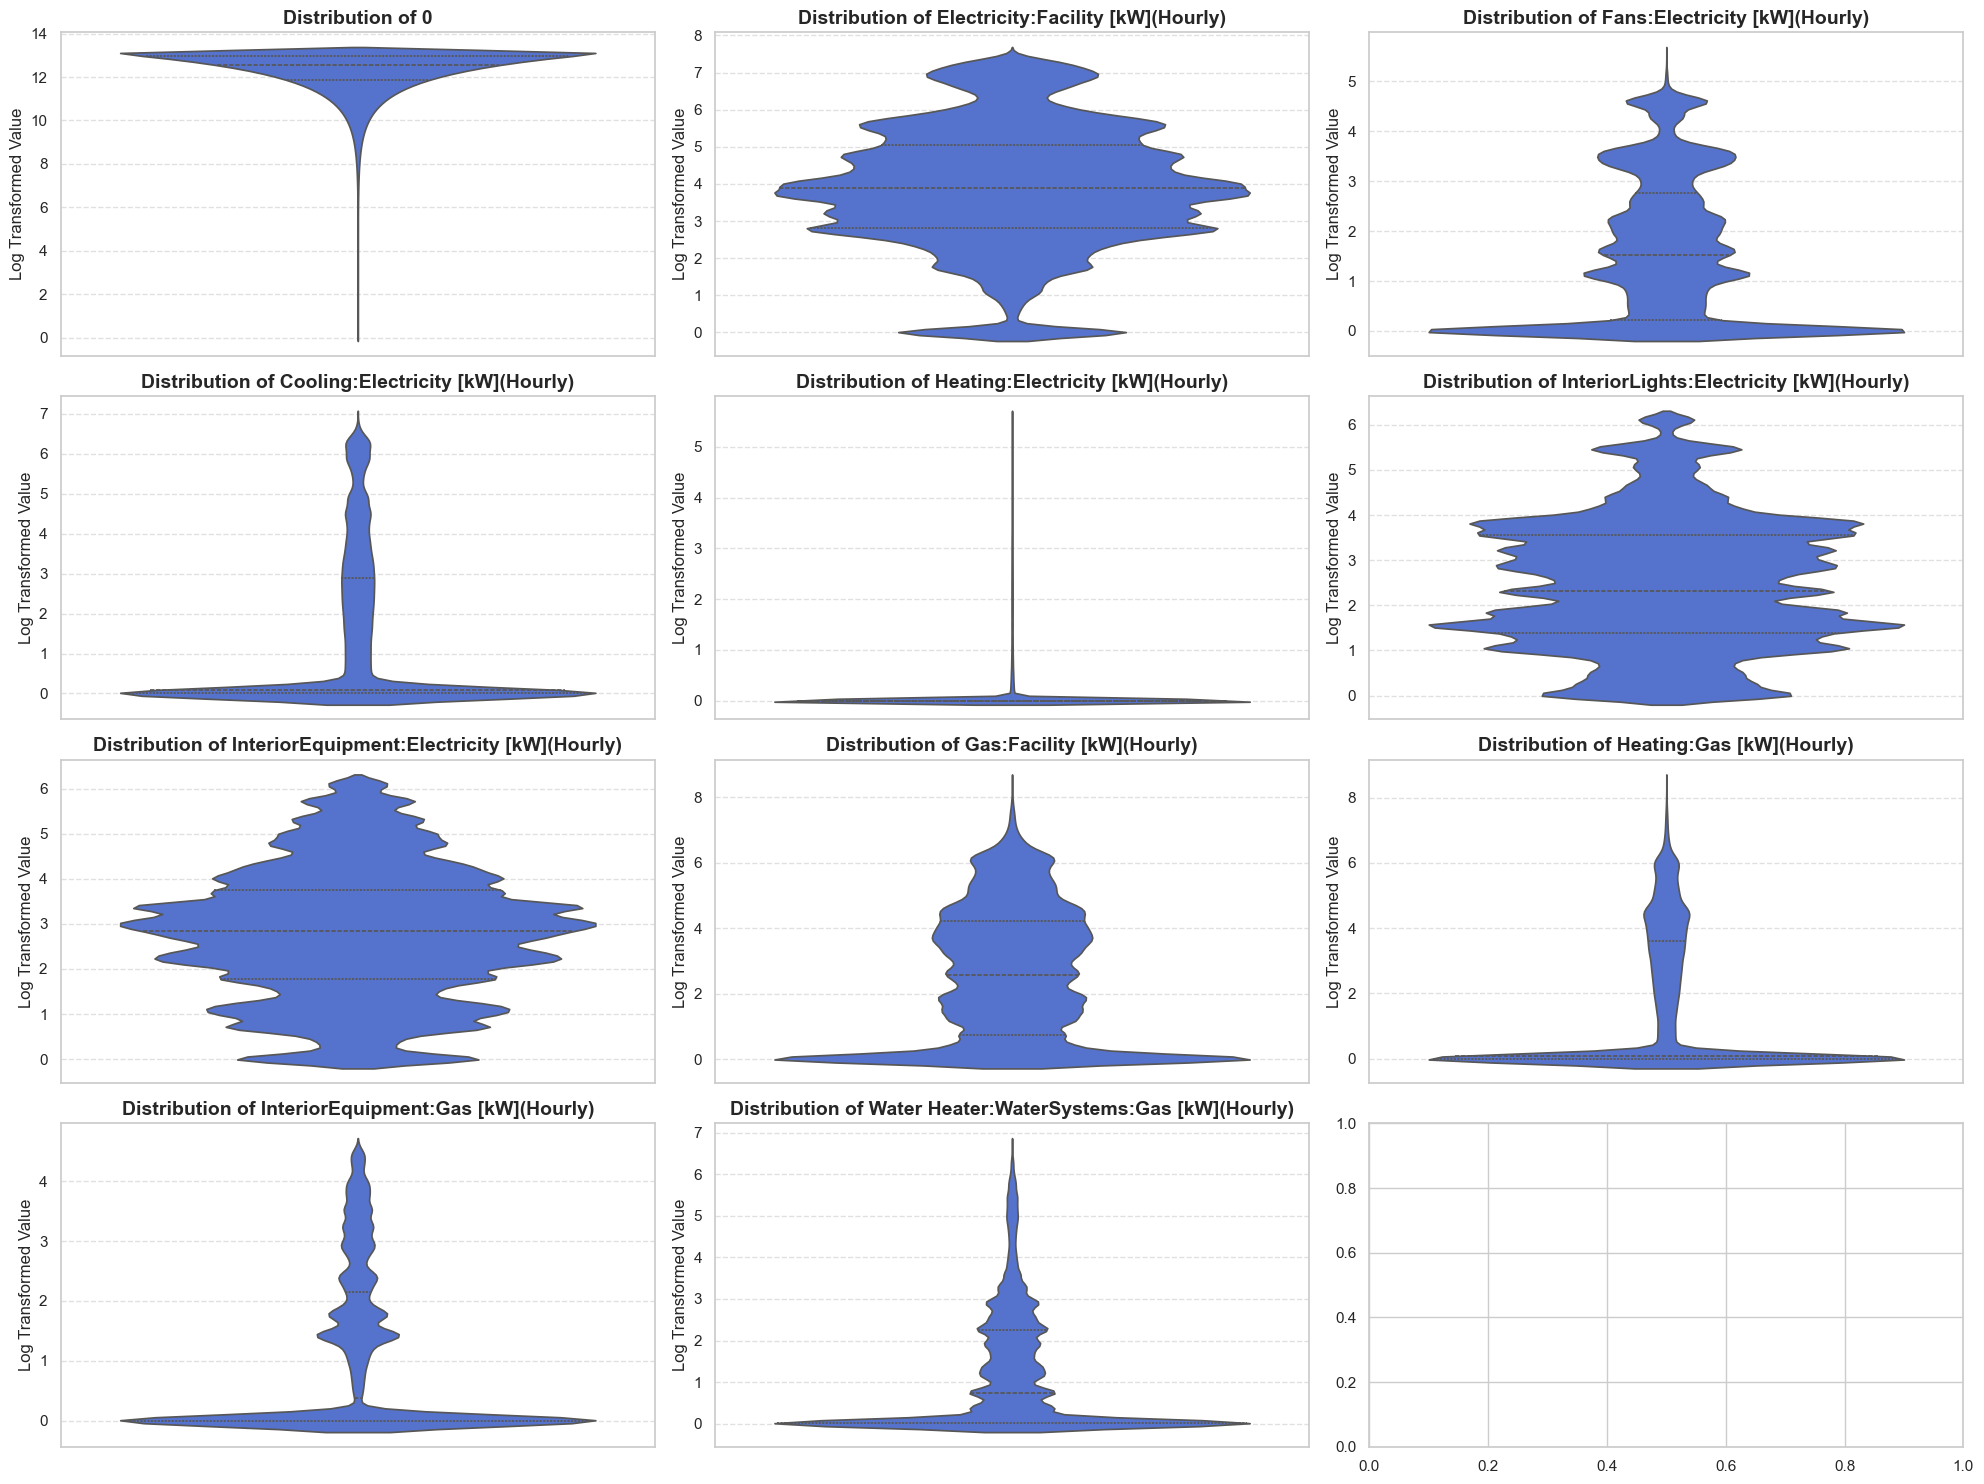

In [4]:

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Set theme for aesthetics
sns.set_theme(style="whitegrid")

# Apply log transformation to handle skewness
df_log = np.log1p(df.select_dtypes(include=['number']))

# Define numerical columns
numerical_cols = df_log.columns

# Create subplots with improved spacing
fig, axes = plt.subplots(nrows=len(numerical_cols)//3 + 1, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(y=df_log[col], ax=axes[i], color="royalblue", inner="quartile")
    axes[i].set_title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("Log Transformed Value")
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()



In [5]:
sns.kdeplot(df["Electricity:Facility [kW](Hourly)"], shade=True, hue=df["theft"])

C:\Users\GNKRISHNAN\AppData\Local\Temp\ipykernel_28320\2813650927.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Electricity:Facility [kW](Hourly)"], shade=True, hue=df["theft"])


ValueError: The following variable cannot be assigned with wide-form data: `hue`

C:\Users\GNKRISHNAN\AppData\Local\Temp\ipykernel_28320\4152032377.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df["Electricity:Facility [kW](Hourly)"], hue=df["theft"], fill=True)


<Axes: xlabel='Electricity:Facility [kW](Hourly)', ylabel='Density'>

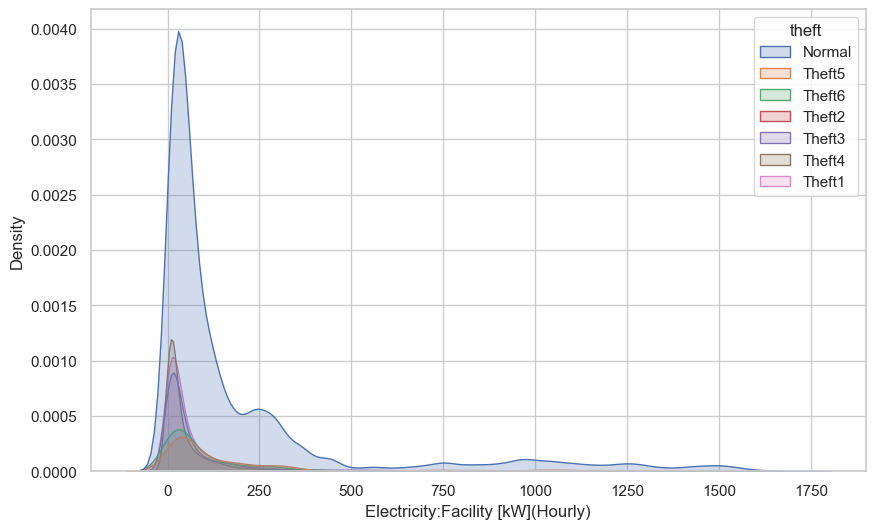

In [9]:
plt.figure(figsize=(10, 6))
# sns.violinplot(x=df["theft"], y=df["Electricity:Facility [kW](Hourly)"], inner=None)
sns.kdeplot(x=df["Electricity:Facility [kW](Hourly)"], hue=df["theft"], fill=True)

Text(0.5, 1.0, 'Q-Q Plot')

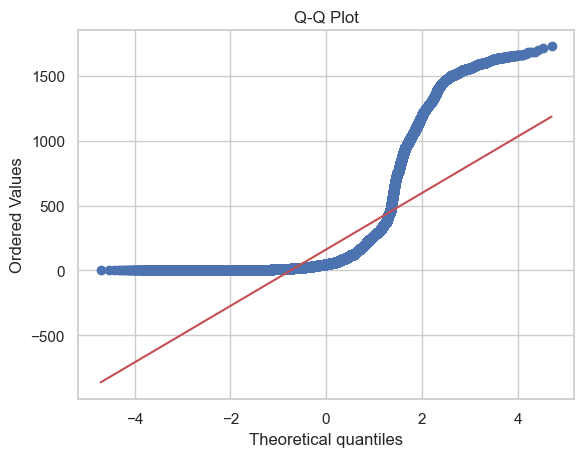

In [7]:
stats.probplot(df["Electricity:Facility [kW](Hourly)"], dist="norm", plot=plt)
plt.title("Q-Q Plot")